#**How to Train YOLO11 Object Detectiont**

In [1]:
!nvidia-smi

Sun Dec 22 17:07:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 23.9 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NIWcStaa1TTkkZqiWpeN")
project = rf.workspace("mohammad-muzammil-shah-wpk02").project("free-palestine")
version = project.version(2)
dataset = version.download("yolov11")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Free-Palestine-2 in yolov11:: 100%|██████████| 172/172 [00:00<00:00, 7720.51it/s]


In [6]:
dataset.location

'/content/Free-Palestine-2'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 81.4MB/s]
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Free-Palestine-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

**Step # 05 Examine Training Results**

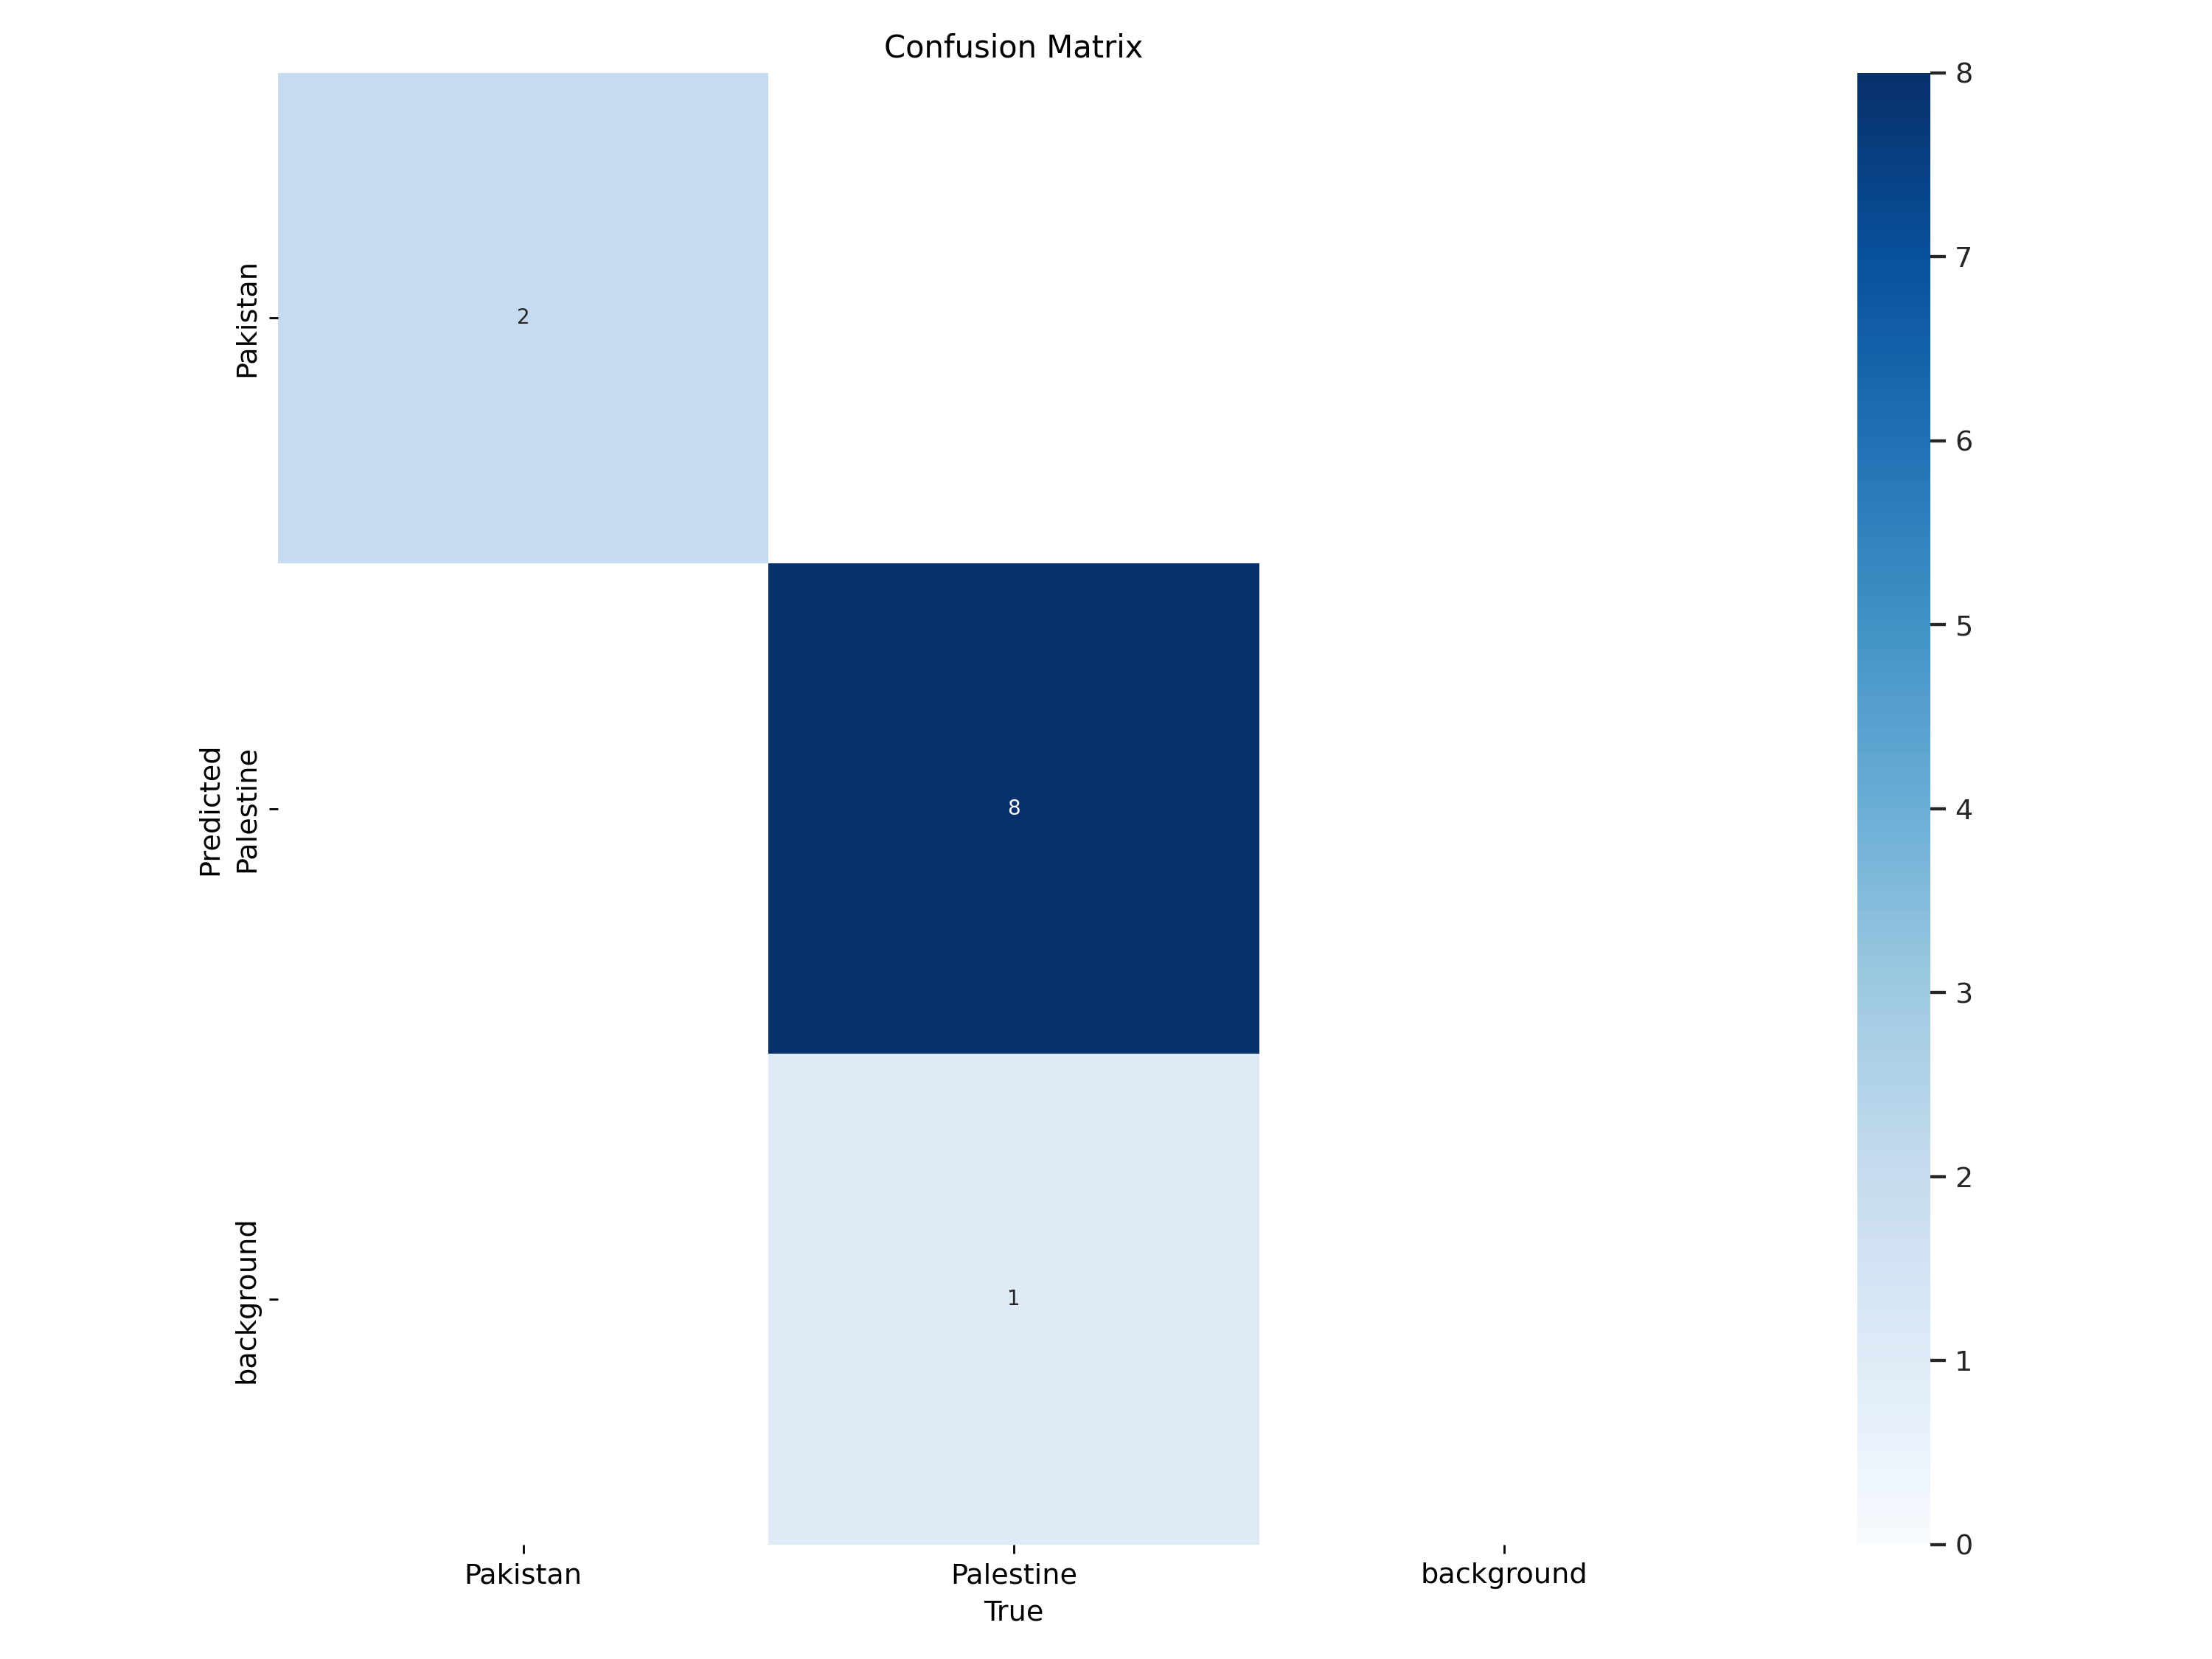

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

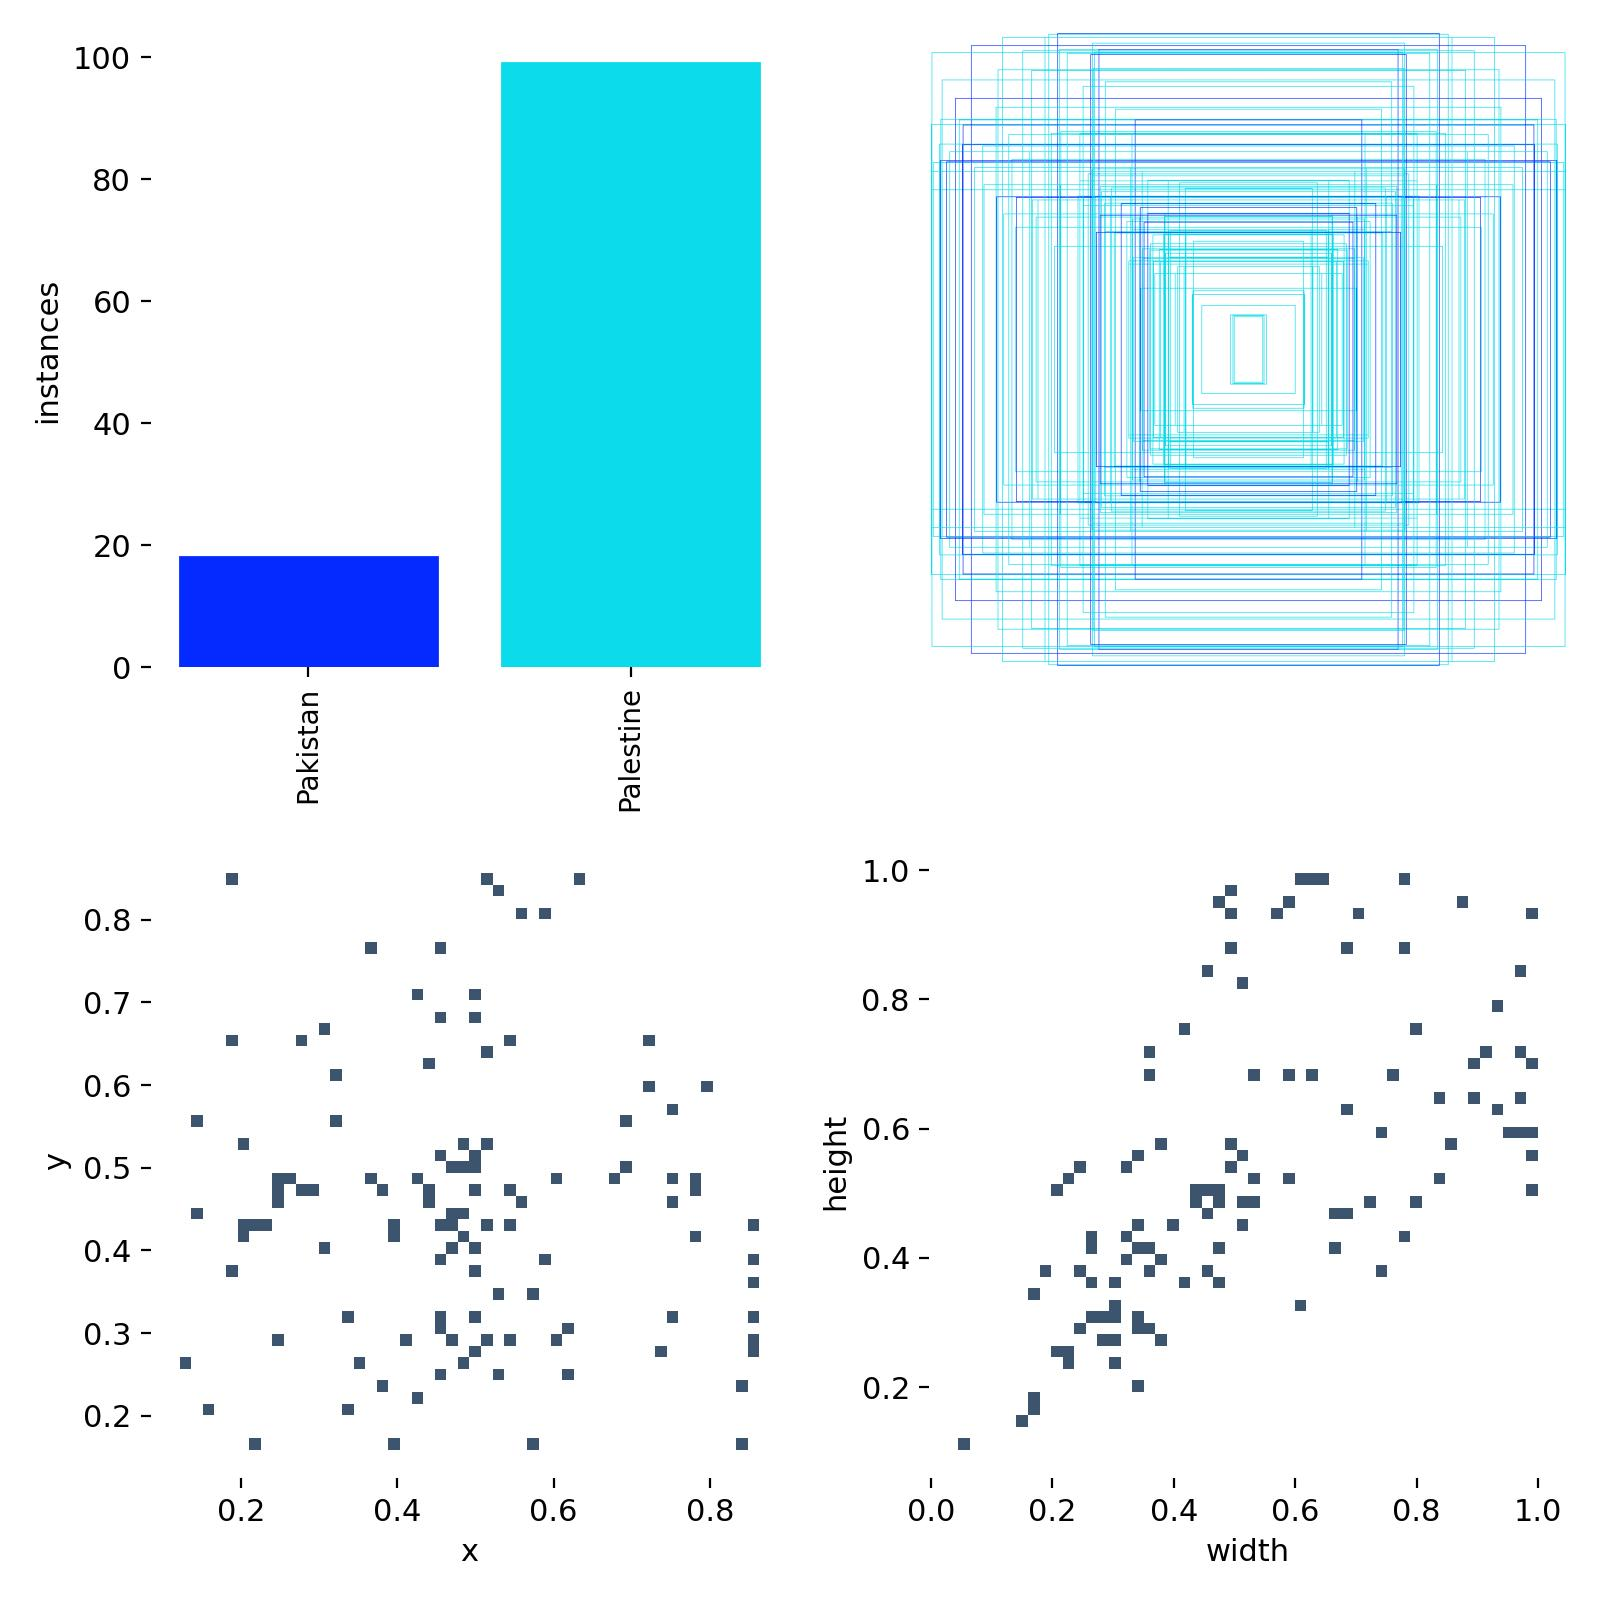

In [9]:
Image("/content/runs/detect/train/labels.jpg", width=600)

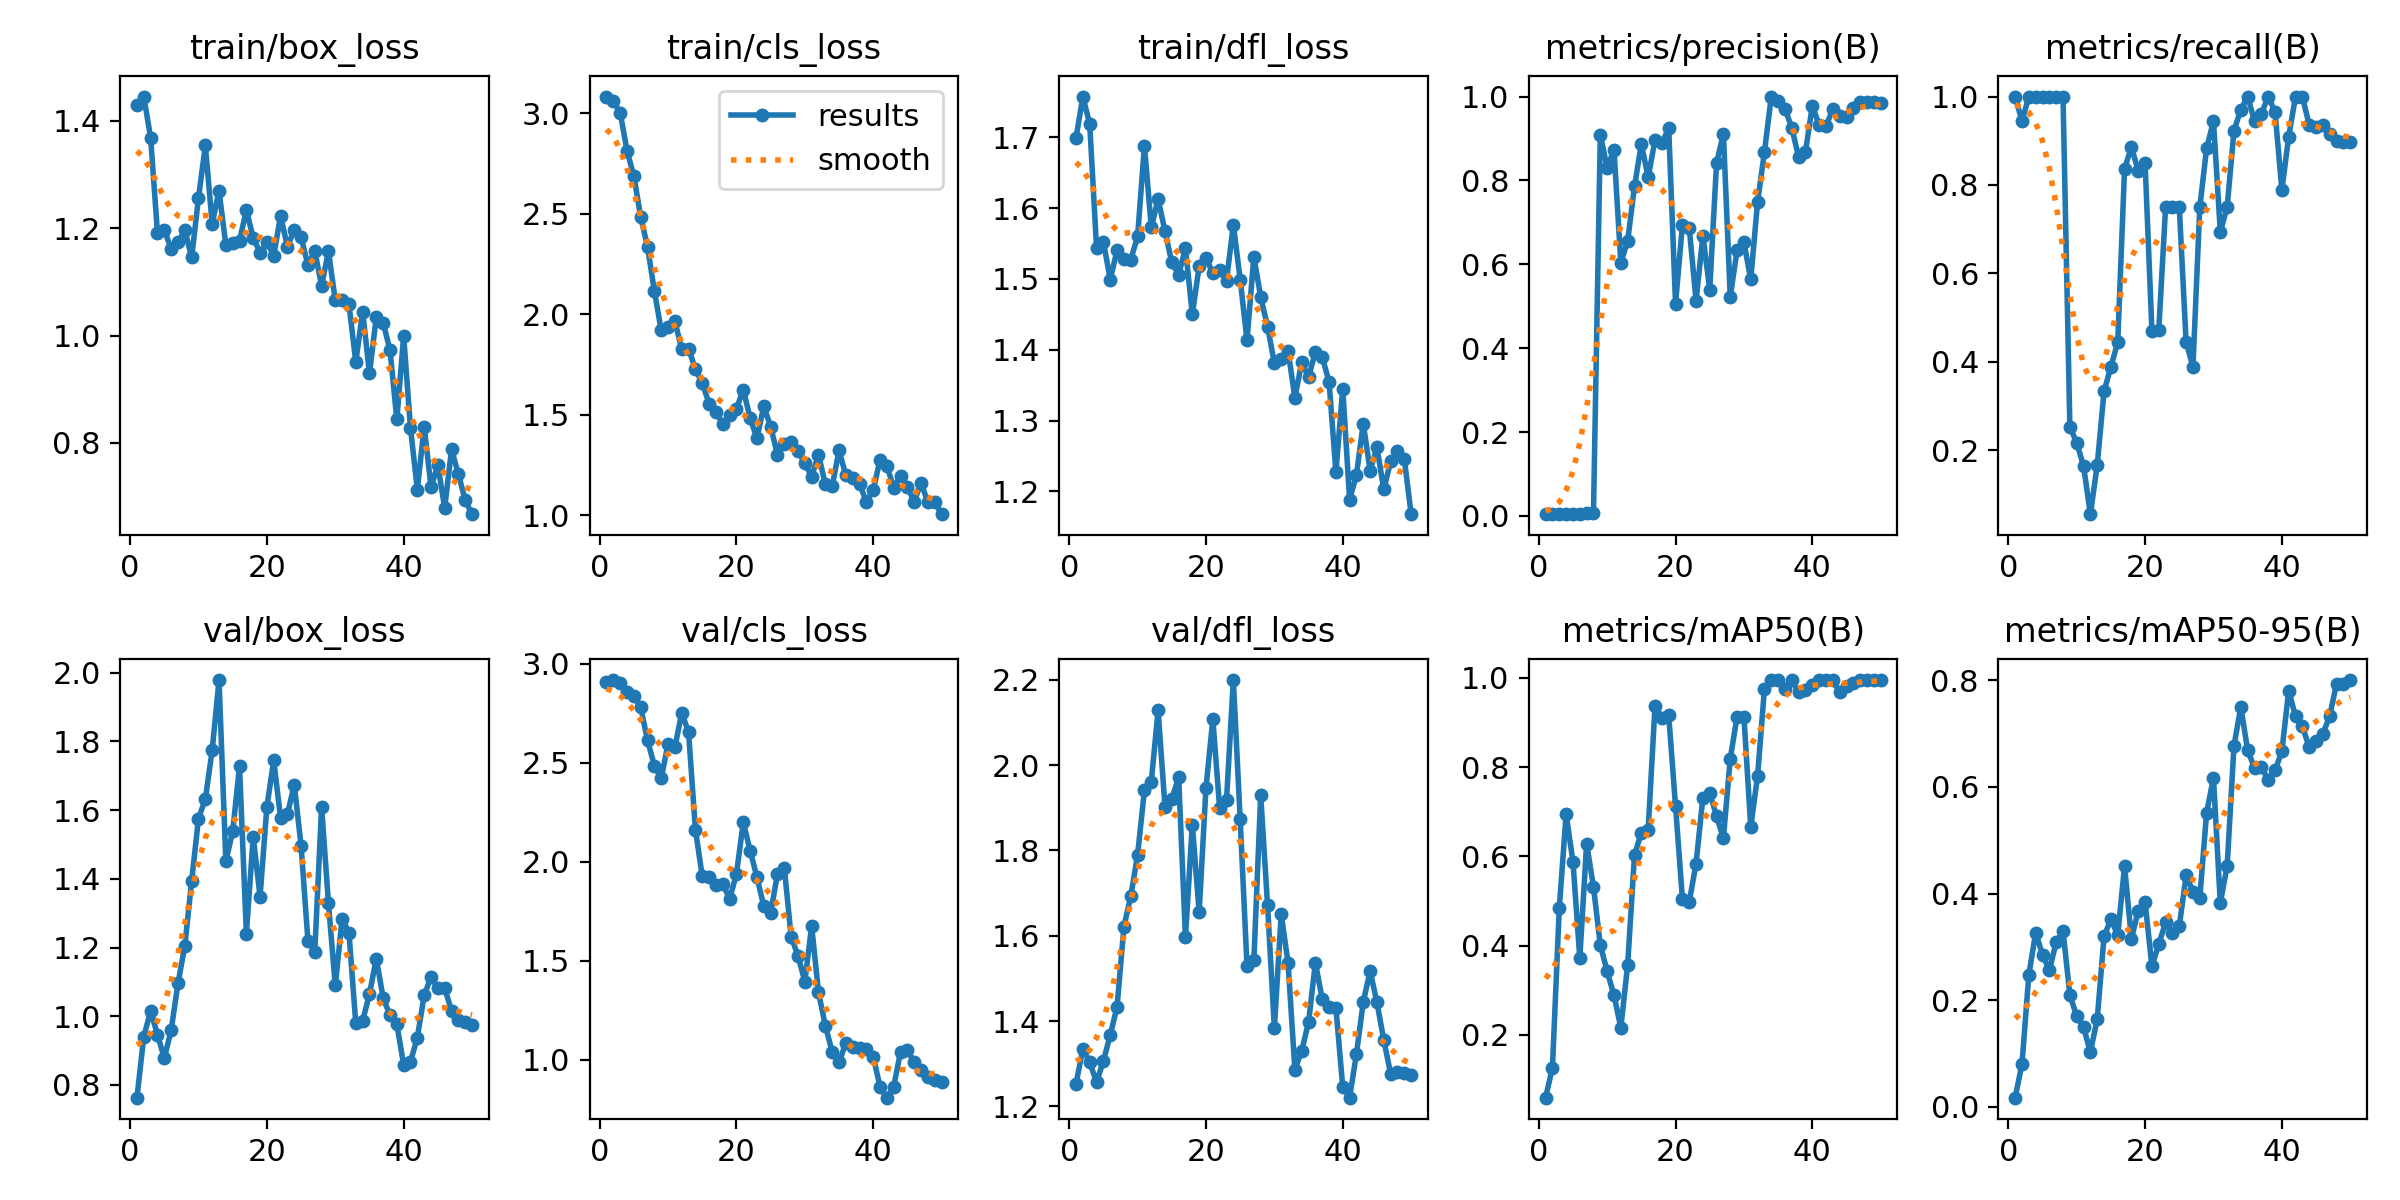

In [10]:
Image("/content/runs/detect/train/results.png", width=600)

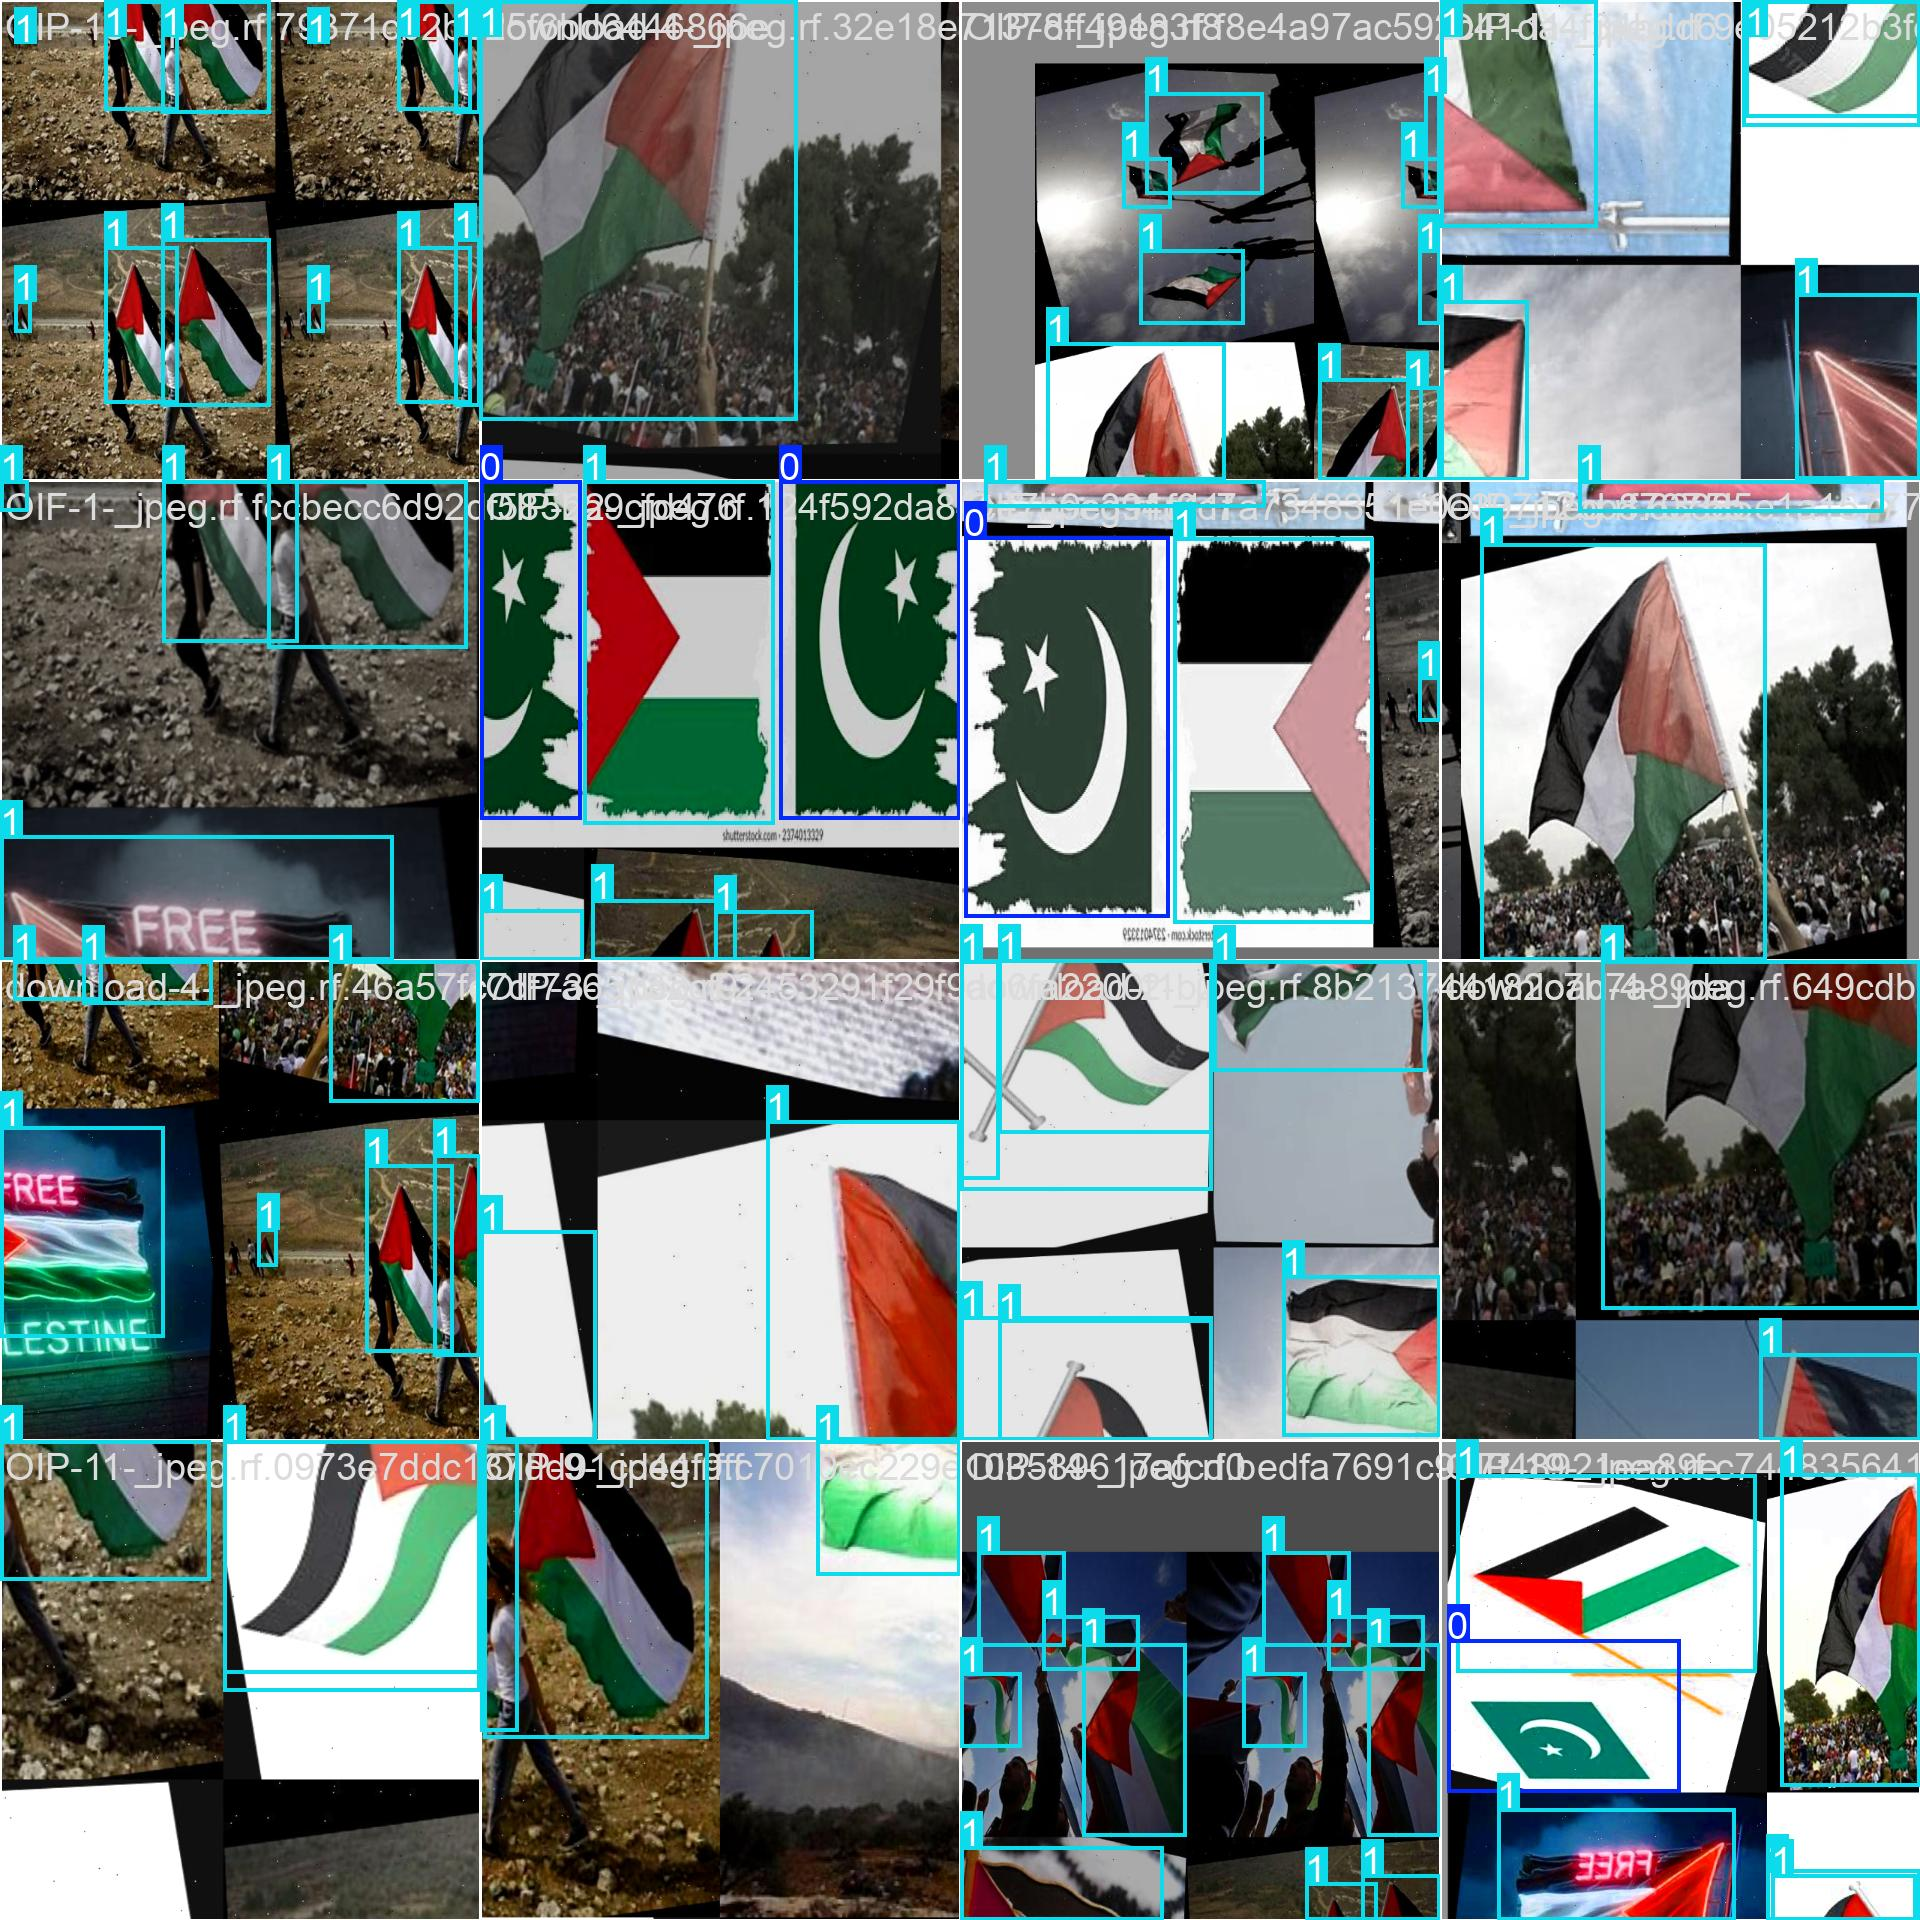

In [11]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

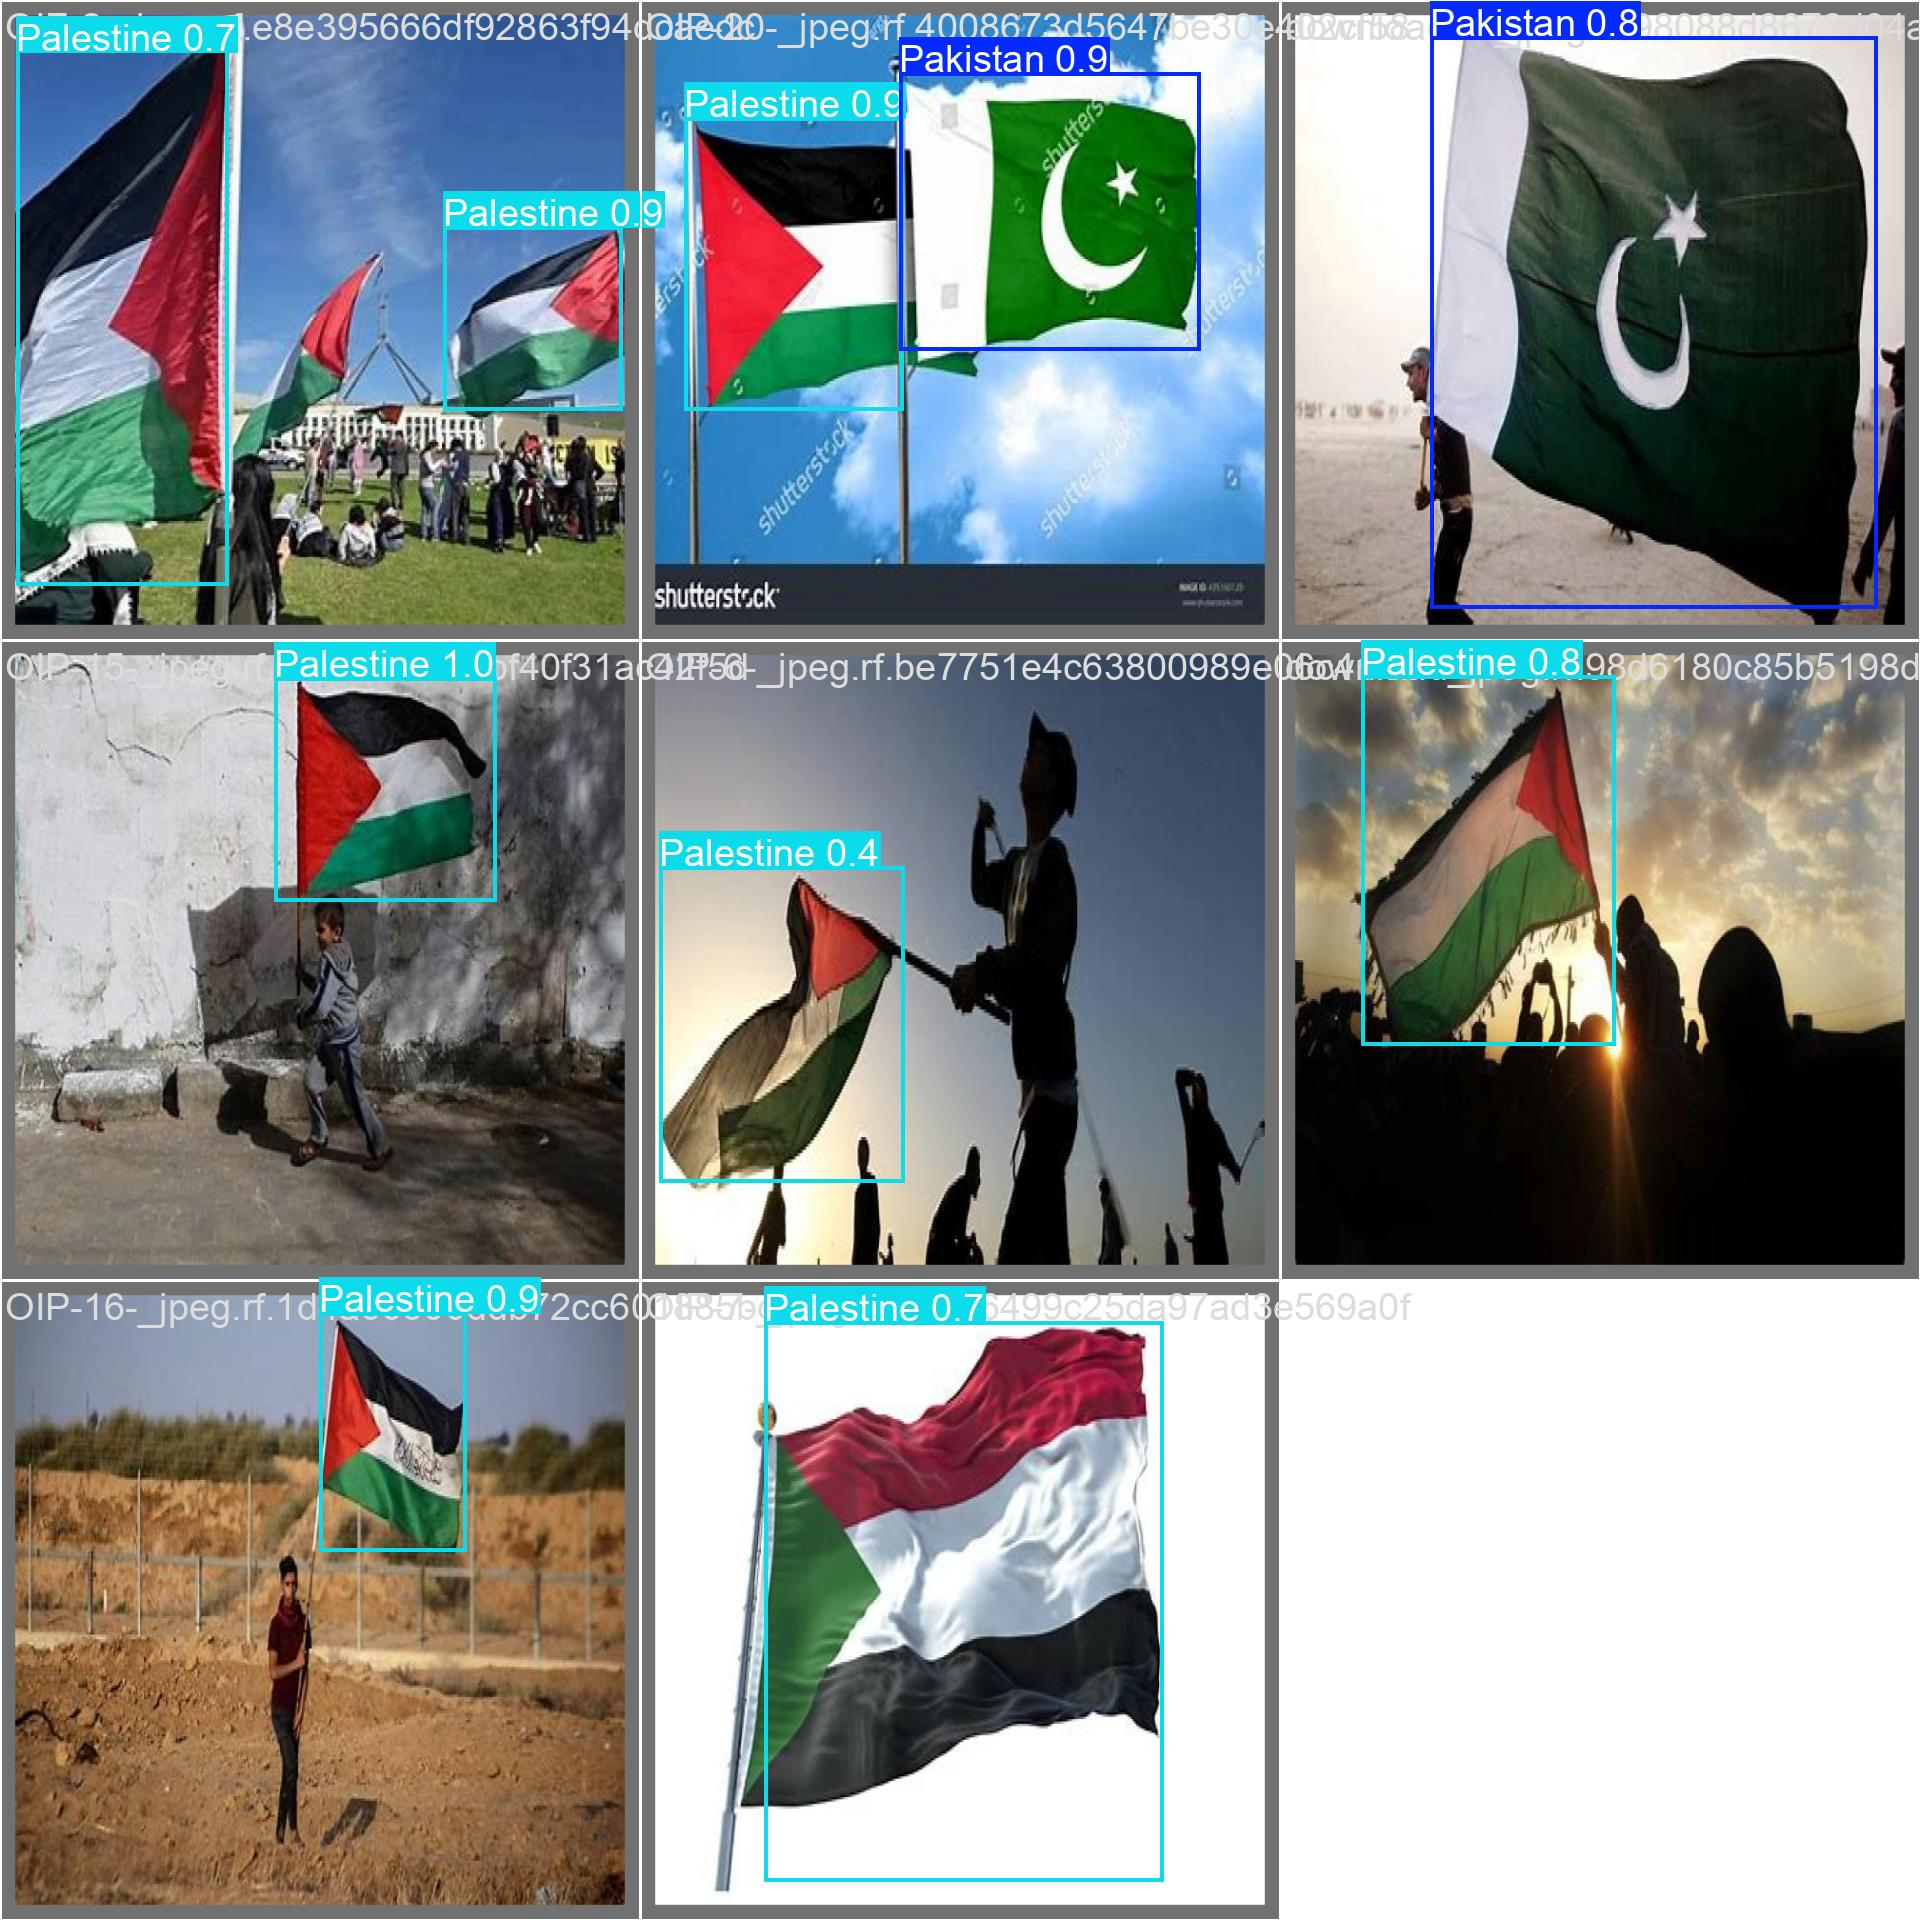

In [12]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [15]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Free-Palestine-2/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.23it/s]
                   all          8         11      0.984      0.898      0.995        0.8
              Pakistan          2          2      0.967          1      0.995      0.895
             Palestine          7          9          1      0.796      0.995      0.705
Speed: 0.3ms preprocess, 9.0ms inference, 0.0ms loss, 73.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Step # 08 Inference with Custom Model on Images**

In [16]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/3 /content/Free-Palestine-2/test/images/OIP-1-_jpeg.rf.552c55b327f4ecb094400dd74488a8cd.jpg: 640x640 1 Palestine, 12.3ms
image 2/3 /content/Free-Palestine-2/test/images/OIP-12-_jpeg.rf.7a7cd2f9329bdc4ca0cb68655cc7162e.jpg: 640x640 1 Palestine, 8.6ms
image 3/3 /content/Free-Palestine-2/test/images/OIP-18-_jpeg.rf.4eec0023918eba2ce3f2a72a0eb0941d.jpg: 640x640 (no detections), 8.3ms
Speed: 2.0ms preprocess, 9.7ms inference, 228.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


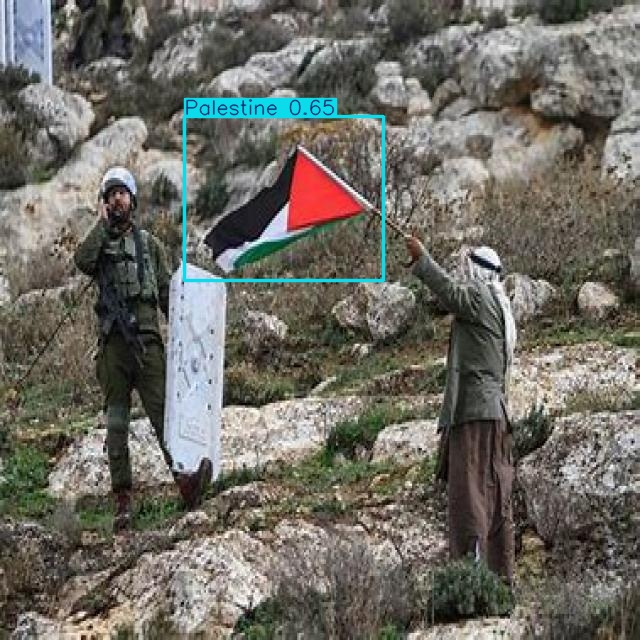

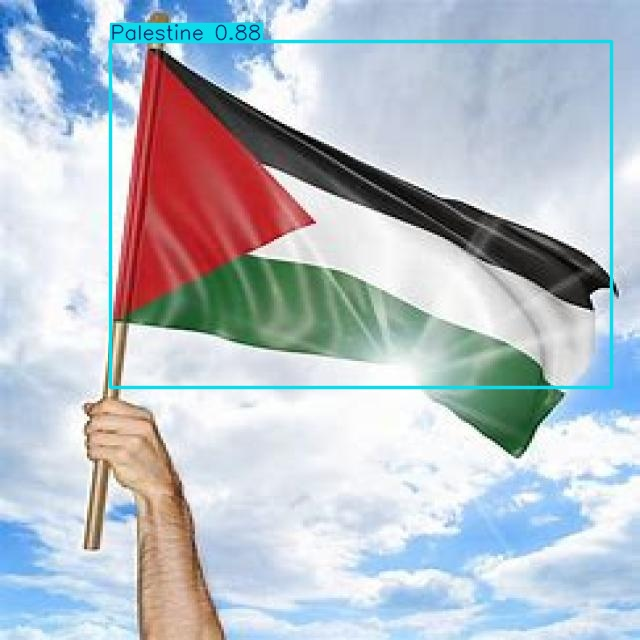

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [22]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/OIP (17).jpeg" save=True
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/OIP (5).jpeg" save=True

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/OIP (17).jpeg: 416x640 1 Pakistan, 56.7ms
Speed: 3.3ms preprocess, 56.7ms inference, 622.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/OIP (5).jpeg: 512x640 1 Palestine, 44.9ms
Speed: 4.1ms preprocess, 44.9ms inference, 560.8ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


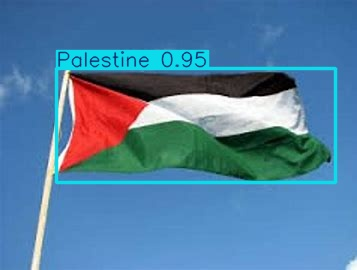

In [24]:

Image("/content/runs/detect/predict4/OIP (5).jpg", width=600)

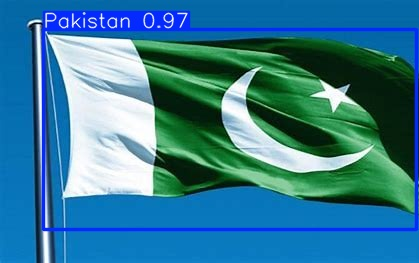

In [25]:
Image("/content/runs/detect/predict2/OIP (17).jpg", width=600)

**Step # 08 Inference with Custom Model on Videos**

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 1 Protective Helmet, 48.5ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 12.5ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.5ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.2ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.9ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.6ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 3 Protective Helmets, 8.8ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 2 Jackets, 2 Protective Helmets, 9.3ms
video 1/1 (frame 9/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 2 Prote

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)